In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import arff
import random

In [3]:
file = open("final-dataset.arff")
decoder = arff.ArffDecoder()
data = decoder.decode(file,encode_nominal=True)

In [4]:
vals = [val[0:-1] for val in data['data']]
labels = [lab[-1] for lab in data['data']]

In [5]:
combined = list(zip(vals, labels))
random.shuffle(combined)
vals, labels = zip(*combined)

In [5]:
# pd.DataFrame(labels).value_counts()

In [6]:
# da = set(labels)
# brac=4000
# temp1=[]
# tempd=[]
# for i in da:
#     coun=0
#     while coun<brac:
#         for j in range(len(labels)):
#             if labels[j]:
#                 temp1.append(labels[j])
#                 tempd.append(vals[j])
#                 coun+=1
#             if coun==brac:
#                 break
# vals = tempd
# labels = temp1

temp1 = []
tempd = []
#Normal
con=0
for j in range(len(labels)):
    if labels[j]==0:
        temp1.append(labels[j])
        tempd.append(vals[j])
        con+=1
    if con==20000:
        break


con=0
for j in range(len(labels)):
    if labels[j]==1:
        temp1.append(labels[j])
        tempd.append(vals[j])
        con+=1
    if con==10000:
        break

con=0
for j in range(len(labels)):
    if labels[j]==2:
        temp1.append(labels[j])
        tempd.append(vals[j])
        con+=1
    if con==10000:
        break

con=0
for j in range(len(labels)):
    if labels[j]==3:
        temp1.append(labels[j])
        tempd.append(vals[j])
        con+=1
    if con==6660:
        break

con=0
for j in range(len(labels)):
    if labels[j]==4:
        temp1.append(labels[j])
        tempd.append(vals[j])
        con+=1
    if con==4100:
        break

vals = tempd
labels = temp1


In [7]:
# print(set(labels))

In [7]:
l = len(vals)
print(l)

X_train, X_test, Y_train, Y_test = train_test_split(vals, labels, stratify=labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

50760


In [9]:
# x_train = pd.DataFrame(x_train)
# print(pd.DataFrame(y_train).value_counts())

In [10]:
# l = len(vals)
# print(l)

# SVM Model with sigmoid kernel

In [11]:
model = SVC(kernel='sigmoid',gamma='auto', verbose=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy: ", (accuracy_score(y_pred, y_test))*100,"%")
print("F1-Score: ", (f1_score(y_pred, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(y_pred, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(y_pred, y_test, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[LibSVM]Accuracy:  72.37487733071639 %
F1-Score:  71.87206773805484 %
Recall:  72.37487733071639 %
Precision:  71.65295866892409 %
Confusion Matrix:
 [[1209    9  750   31    1]
 [ 156 1756   83    5    0]
 [ 785   11 1042   74   88]
 [  43    1   40 1246    2]
 [  26    0  112   35  647]]


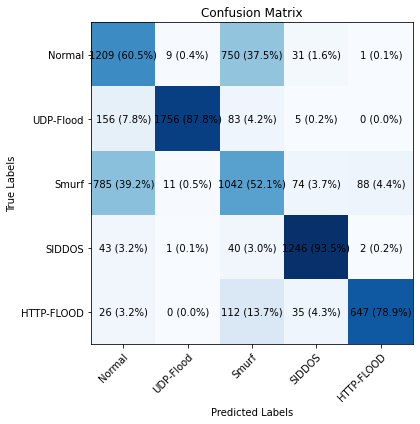

In [12]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), class_names)

# Random Forest Claasifier

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)

rf_predictions = rf_classifier.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("F1-Score: ", (f1_score(rf_predictions, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(rf_predictions, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(rf_predictions, y_test, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.7471786064769381
F1-Score:  74.51486716102632 %
Recall:  74.71786064769381 %
Precision:  74.51408391624828 %
Confusion Matrix:
 [[1258   57  665   20    0]
 [ 136 1801   61    2    0]
 [ 831   46 1053   64    6]
 [  48    0   64 1194   26]
 [   0    0    3   32  785]]


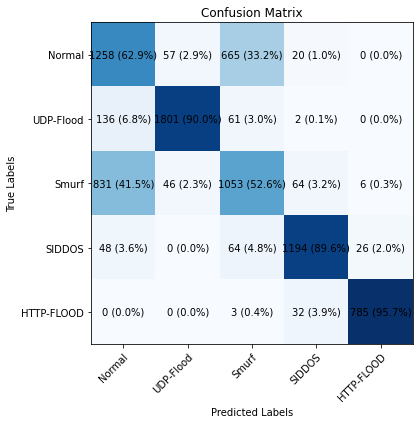

In [14]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, rf_predictions), class_names)

# Decision Tree Classifier

In [15]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

dt_predictions = dt_classifier.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("F1-Score: ", (f1_score(dt_predictions, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(dt_predictions, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(dt_predictions, y_test, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))


Decision Tree Accuracy: 0.7276741903827282
F1-Score:  72.8240589686077 %
Recall:  72.76741903827282 %
Precision:  72.90634968979487 %
Confusion Matrix:
 [[1056  128  765   51    0]
 [ 122 1808   61    9    0]
 [ 699   84 1139   68   10]
 [  35    6   91 1153   47]
 [   0    0   13   31  776]]


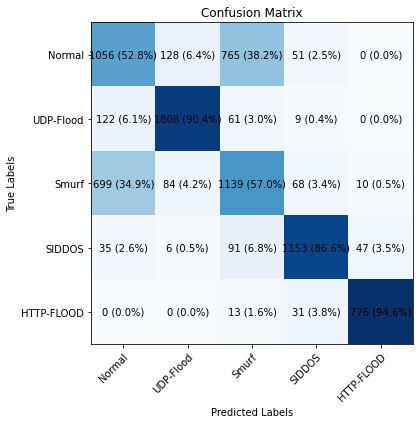

In [17]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, dt_predictions), class_names)

# KNN Classifier

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)

knn_predictions = knn_classifier.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("F1-Score: ", (f1_score(knn_predictions, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(knn_predictions, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(knn_predictions, y_test, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

KNN Accuracy: 0.7811579980372915
F1-Score:  78.2529252703515 %
Recall:  78.11579980372915 %
Precision:  80.85498808455647 %
Confusion Matrix:
 [[1622    3  374    0    1]
 [ 169 1794   37    0    0]
 [1031    2  905   55    7]
 [  59    0   10 1263    0]
 [   0    0    0   36  784]]


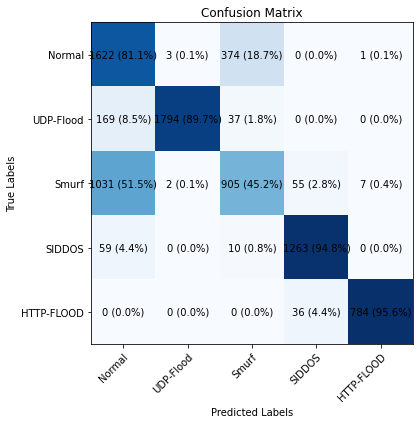

In [20]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, knn_predictions), class_names)

# Naive Bayer Classifier

In [21]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

nb_predictions = nb_classifier.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("F1-Score: ", (f1_score(nb_predictions, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(nb_predictions, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(nb_predictions, y_test, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))

Naive Bayes Accuracy: 0.7958783120706575
F1-Score:  80.9583913860081 %
Recall:  79.58783120706575 %
Precision:  89.93557704914038 %
Confusion Matrix:
 [[1970    0   25    5    0]
 [ 204 1794    2    0    0]
 [1253    0  686   56    5]
 [  68    0    1 1254    9]
 [   0    0    0   36  784]]


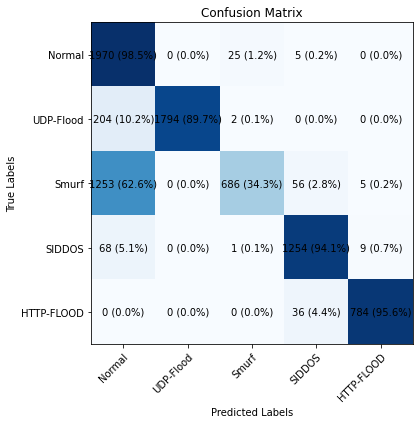

In [22]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, nb_predictions), class_names)

# LSVM classifier

In [23]:
svm_classifier = LinearSVC()
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)

# Calculate the accuracy of the LSVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("F1-Score: ", (f1_score(y_pred, y_test, average="weighted"))*100,"%")
print("Recall: ", (recall_score(y_pred, y_test, average="weighted"))*100,"%")
print("Precision: ", (precision_score(y_pred, y_test, average="weighted"))*100,"%")
print("LSVM Accuracy:", accuracy)

F1-Score:  81.06453366645593 %
Recall:  79.50196270853777 %
Precision:  90.50525116178673 %
LSVM Accuracy: 0.7950196270853778


c:\Users\Nishant S\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


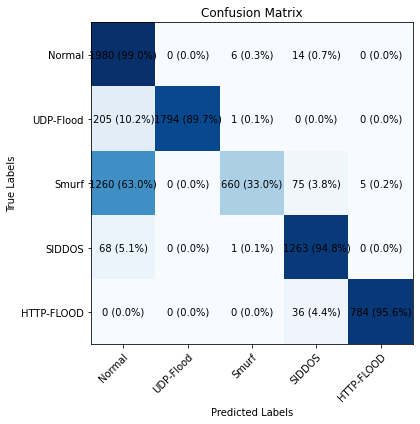

In [24]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), class_names)

# ANN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
print(x_train.shape[1])

27


In [10]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [13]:
y_train_copy = y_train
y_test_copy = y_test

In [14]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [15]:
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [16]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1269/1269 [==============================] - 15s 9ms/step - loss: 0.5030 - accuracy: 0.8227 - val_loss: 0.4616 - val_accuracy: 0.8360
Epoch 2/20
1269/1269 [==============================] - 14s 11ms/step - loss: 0.4654 - accuracy: 0.8352 - val_loss: 0.4560 - val_accuracy: 0.8365
Epoch 3/20
1269/1269 [==============================] - 12s 9ms/step - loss: 0.4625 - accuracy: 0.8351 - val_loss: 0.4583 - val_accuracy: 0.8361
Epoch 4/20
1269/1269 [==============================] - 12s 9ms/step - loss: 0.4619 - accuracy: 0.8352 - val_loss: 0.4597 - val_accuracy: 0.8362
Epoch 5/20
1269/1269 [==============================] - 12s 9ms/step - loss: 0.4607 - accuracy: 0.8353 - val_loss: 0.4558 - val_accuracy: 0.8365
Epoch 6/20
1269/1269 [==============================] - 12s 9ms/step - loss: 0.4596 - accuracy: 0.8352 - val_loss: 0.4548 - val_accuracy: 0.8365
Epoch 7/20
1269/1269 [==============================] - 13s 10ms/step - loss: 0.4602 - accuracy: 0.8352 - val_loss: 0.4535 - val_

In [17]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)

print("Accuracy:", accuracy_score(predictions, y_test_copy)*100,"%")
print("F1-Score: ", (f1_score(predictions, y_test_copy, average="weighted"))*100,"%")
print("Recall: ", (recall_score(predictions, y_test_copy, average="weighted"))*100,"%")
print("Precision: ", (precision_score(predictions, y_test_copy, average="weighted"))*100,"%")
print("Confusion Matrix:\n", confusion_matrix(y_test_copy, predictions))

318/318 [==============================] - 1s 4ms/step
Accuracy: 83.65839243498819 %
F1-Score:  85.95043419558502 %
Recall:  83.65839243498819 %
Precision:  93.034233049575 %
Confusion Matrix:
 [[3998    0    0    1    1]
 [ 184 1816    0    0    0]
 [1304    0  632   54   10]
 [  70    0    0 1262    0]
 [   0    0    0   35  785]]


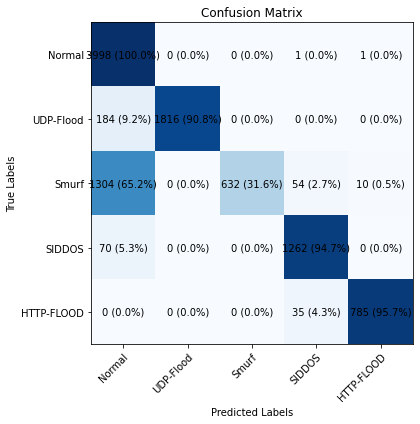

In [18]:
def plot_confusion_matrix(confusion_matrix_data, class_names):
    # Normalize the confusion matrix to show percentages
    confusion_matrix_data_normalized = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the heatmap
    im = ax.imshow(confusion_matrix_data_normalized, interpolation='nearest', cmap=plt.cm.Blues)

    # Show all ticks and label them with class names
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set alignment to center
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over the data and add text annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f"{confusion_matrix_data[i, j]} ({confusion_matrix_data_normalized[i, j]*100:.1f}%)",
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    fig.tight_layout()

    plt.show()

# Example class names for the confusion matrix (replace with your own)
class_names = ["Normal", "UDP-Flood" , "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test_copy, predictions), class_names)

In [32]:
acc = [72.9268, 73.2458, 76.3861, 75.4293, 79.5510, 79.4283, 83.6583]
f1 = [72.9267, 73.2385, 76.2259, 75.2689, 80.8732, 80.9408, 85.9504]
recall = [72.9268, 73.2458, 76.3864, 75.4293, 79.5510, 79.4283, 84.6891]
precision = [74.1988, 73.2406, 76.9550, 75.3666, 89.5750, 90.1311, 93.0342]

In [23]:
acc = pd.DataFrame(acc)

<AxesSubplot:>

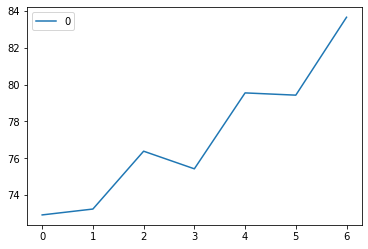

In [24]:
acc.plot()

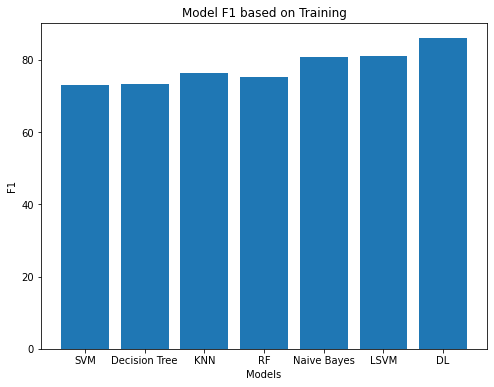

In [42]:
# X-axis labels
x_labels = ['SVM', 'Decision Tree', 'KNN', 'RF', 'Naive Bayes', 'LSVM', 'DL']

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size (optional)

# Plot the accuracy values
plt.bar(x_labels, f1)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('Model F1 based on Training')

# Display grid (optional, uncomment if needed)
# plt.grid(True)

# Display the plot
plt.show()